# Problem Solutions 

unit is expressed in mm



## Problem 1 


Find, by the use of Figure 1, the direct kinematic transformations, $T^0_4$ for the robot stylus, and $T^0_5$ for the robot camera, as function of all joint angles.

In [31]:
from visual_kinematics.RobotSerial import *
import numpy as np
import sympy as sp
import math

from RobotController import *
import importlib

import RobotFunctions as RF
importlib.reload(RF) # **********

<module 'RobotFunctions' from 'c:\\Users\\justi\\OneDrive - Monash University\\Documents\\5. 34753 Robotics\\34753_Robotics_Group19\\RobotFunctions.py'>

In [32]:
# Symbols
theta1, theta2, theta3, theta4 = sp.symbols('theta1 theta2 theta3 theta4', real=True)
d1, d2, d3, d4 = sp.symbols('d1 d2 d3 d4', real=True)

# DH transforms
T01 = RF.make_DH_matrix(theta1,  d1,   0,        sp.pi/2)
T12 = RF.make_DH_matrix(theta2,   0,  d2,       0)
T23 = RF.make_DH_matrix(theta3,   0,  d3,       0)
T34 = RF.make_DH_matrix(theta4,   0,  d4,       0)

# Manual T45 (pure translation)
T45 = sp.Matrix([
    [1, 0, 0, -0.015],
    [0, 1, 0,  0.045],
    [0, 0, 1,  0.0  ],
    [0, 0, 0,  1    ],
])

In [33]:
T01_sym = sp.simplify(T01)
RF.print_matrix_aligned("T01 (symbolic)", T01_sym)

T12_sym = sp.simplify(T12)
RF.print_matrix_aligned("T12 (symbolic)", T12_sym)

T23_sym = sp.simplify(T23)
RF.print_matrix_aligned("T23 (symbolic)", T23_sym)

T34_sym = sp.simplify(T34)
RF.print_matrix_aligned("T34 (symbolic)", T34_sym)


T01 (symbolic) =
┌             │      │              │      ┐
│ cos(theta1) │    0 │  sin(theta1) │    0 │
│ sin(theta1) │    0 │ -cos(theta1) │    0 │
│           0 │ 1.00 │            0 │   d1 │
│           0 │    0 │            0 │ 1.00 │
└             │      │              │      ┘

T12 (symbolic) =
┌             │              │      │                ┐
│ cos(theta2) │ -sin(theta2) │    0 │ d2*cos(theta2) │
│ sin(theta2) │  cos(theta2) │    0 │ d2*sin(theta2) │
│           0 │            0 │ 1.00 │              0 │
│           0 │            0 │    0 │           1.00 │
└             │              │      │                ┘

T23 (symbolic) =
┌             │              │      │                ┐
│ cos(theta3) │ -sin(theta3) │    0 │ d3*cos(theta3) │
│ sin(theta3) │  cos(theta3) │    0 │ d3*sin(theta3) │
│           0 │            0 │ 1.00 │              0 │
│           0 │            0 │    0 │           1.00 │
└             │              │      │                ┘

T34 (symbolic) 

In [34]:
# Symbolic total transform
T04_sym = sp.simplify(T01 * T12 * T23 * T34)
T05_sym = sp.simplify(T01 * T12 * T23 * T34 * T45)

print("=== SYMBOLIC MATRICES ===")

RF.print_matrix_aligned("T04 (symbolic)", T04_sym)
RF.print_matrix_aligned("T05 (symbolic)", T05_sym)

=== SYMBOLIC MATRICES ===

T04 (symbolic) =
┌                                           │                                            │              │                                                                                           ┐
│ cos(theta1)*cos(theta2 + theta3 + theta4) │ -sin(theta2 + theta3 + theta4)*cos(theta1) │  sin(theta1) │ (d2*cos(theta2) + d3*cos(theta2 + theta3) + d4*cos(theta2 + theta3 + theta4))*cos(theta1) │
│ sin(theta1)*cos(theta2 + theta3 + theta4) │ -sin(theta1)*sin(theta2 + theta3 + theta4) │ -cos(theta1) │ (d2*cos(theta2) + d3*cos(theta2 + theta3) + d4*cos(theta2 + theta3 + theta4))*sin(theta1) │
│             sin(theta2 + theta3 + theta4) │              cos(theta2 + theta3 + theta4) │            0 │          d1 + d2*sin(theta2) + d3*sin(theta2 + theta3) + d4*sin(theta2 + theta3 + theta4) │
│                                         0 │                                          0 │            0 │                                                           

## Problem 2 
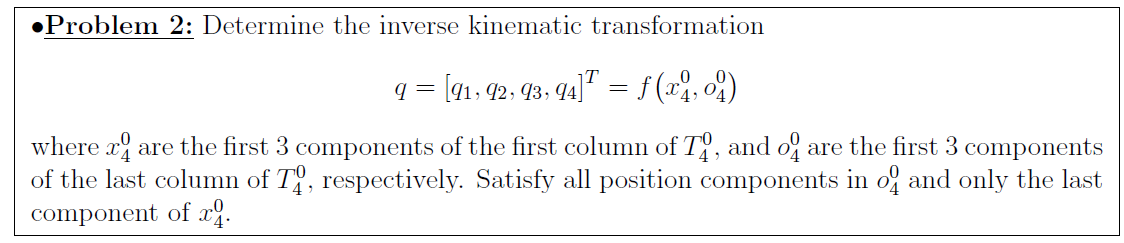

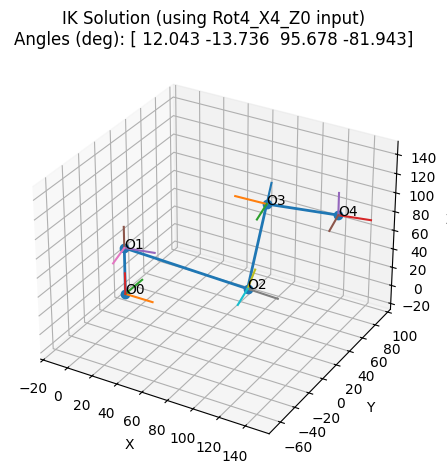

IK solution (rad): [ 0.21018259 -0.23973022  1.66990262 -1.4301724 ]
IK solution (deg): [ 12.04257514 -13.73552965  95.67837236 -81.94284271]
FK end-effector position (mm): [150.  32. 120.]
Target position (mm):          [150.  32. 120.]
Position error norm (mm):      7.105427357601002e-15


In [35]:
from RobotFunctions import solve_fk_ik_and_visualize

# [1] Robot geometry (mm)
d1 = 50.0
d2 = 93.0
d3 = 93.0
d4 = 50.0

# [2] Inputs (robot position, and orientation of x-axis of end effector)
pos4 = np.array([150.0, 32.0, 120.0], dtype=float)  # End-effector position (o4^0)
Rot4_X4_Z0 = 0.0                                    # z-component of x4-axis (r31 of R04)

# [3] Solve IK, verify with FK, and visualise
q, T04_fk, T04_target = solve_fk_ik_and_visualize(pos4, Rot4_X4_Z0, d1, d2, d3, d4, draw_axes=True)

# [4] Print results
print("IK solution (rad):", q)
print("IK solution (deg):", np.rad2deg(q))

p_fk = T04_fk[0:3, 3]
print("FK end-effector position (mm):", p_fk)
print("Target position (mm):         ", pos4)
print("Position error norm (mm):     ", np.linalg.norm(p_fk - pos4))

## Problem 3 
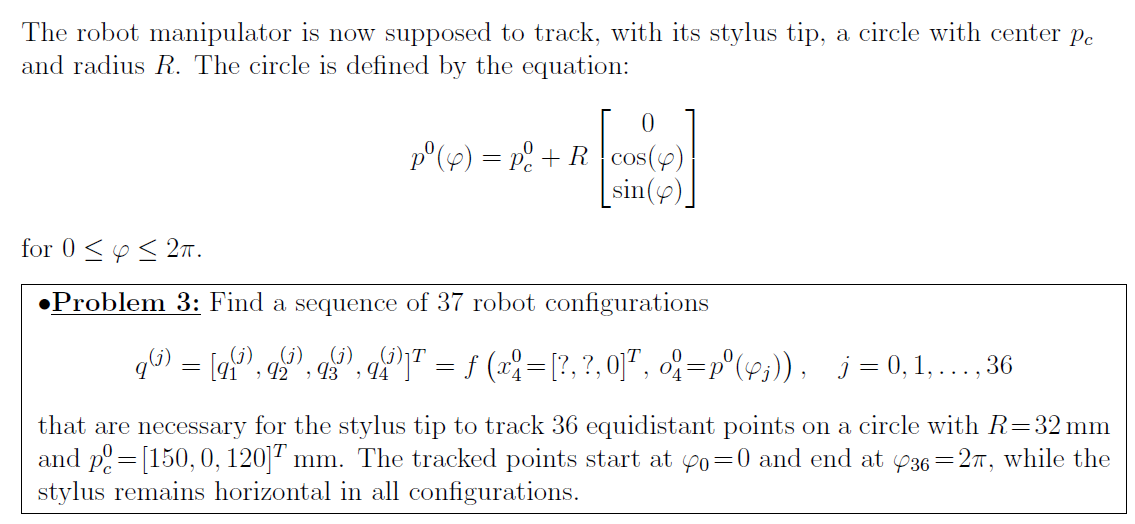

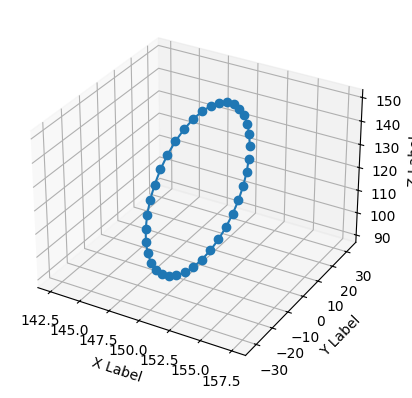

[[  12.04257514  -94.90976679  -30.39786587  125.30763266]
 [  11.87430547  -91.92521397  -27.46499999  119.39021396]
 [  11.37311952  -88.78759689  -24.56551271  113.3531096 ]
 [  10.55006526  -85.71085297  -21.78557838  107.49643135]
 [   9.42409176  -82.88642717  -19.21243785  102.09886502]
 [   8.02264767  -80.45565298  -16.93177571   97.38742868]
 [   6.38213293  -78.50309411  -15.02428799   93.52738211]
 [   4.54788645  -77.06674433  -13.5614673    90.62821163]
 [   2.57342183  -76.15561164  -12.60093726   88.7565489 ]
 [   0.51874888  -75.76657173  -12.18198522   87.94855695]
 [  -1.55217164  -75.89613372  -12.32212945   88.21826317]
 [  -3.574557    -76.54560527  -13.01548335   89.56108861]
 [  -5.48605809  -77.71936641  -14.23331246   91.95267887]
 [  -7.22964526  -79.41632423  -15.9266473    95.34297153]
 [  -8.75574124  -81.61527691  -18.03034054   99.64561745]
 [ -10.02343385  -84.25691188  -20.46773108  104.72464296]
 [ -11.00083378  -87.22870162  -23.1551468   110.3838484

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # just to enable 3D plotting

def plot_positions(positions):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = positions[:, 0]
    ys = positions[:, 1]
    zs = positions[:, 2]
    ax.plot(xs, ys, zs, marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()


def generate_position(n, radius, start_pos) -> np.ndarray:
    positions = []
    for i in range(n):
        offset = np.array([0, np.cos(i * 2 * np.pi / n), np.sin(i * 2 * np.pi / n)])
        new_pos = start_pos + radius*offset
        positions.append(new_pos)
    return np.array(positions)

final = []
# draws a circle in the xy plane, how do we account to always pen horizontal?
start_pos = np.array([150, 0, 120])
radius = 32
granularity = 37
positions = generate_position(granularity, radius, start_pos)
# list of angles
robot_config = []
for i in range(granularity):
    #print(positions[i])
    robot_config.append(RobotFunctions.inverse(positions[i].reshape(3,1), 0, dh_params))

plot_positions(positions)
robot_angle = np.array(robot_config)

print(robot_angle)



In [ ]:
# --- Problem 3: Circle tracking with horizontal stylus (37 positions) ---

import numpy as np
import matplotlib.pyplot as plt
from RobotFunctions import (
    build_pose_from_inputs,
    inverse_ik_from_pose,
    fk_T04,
    plot_robot_4link
)

# ---------- Circle specification ----------
phi = np.linspace(0.0, 2*np.pi, 37)                   # 37 points (φ₀ ... φ₃₆)
p_c0 = np.array([150.0, 0.0, 120.0], dtype=float)     # circle centre in {0}
R = 32.0                                              # circle radius (mm)
Rot4_X4_Z0 = 0.0                                      # stylus horizontal (r31 = 0)

# ---------- Storage ----------
Q_rad, Q_deg, P_fk, P_trg, errs = [], [], [], [], []

# ---------- Compute for each waypoint ----------
for th in phi:
    # Circle point: p⁰(φ) = p_c⁰ + R·[0, cosφ, sinφ]^T
    p_target = p_c0 + R * np.array([0.0, np.cos(th), np.sin(th)], dtype=float)

    # Build full pose and solve IK
    T_target = build_pose_from_inputs(p_target, Rot4_X4_Z0)
    q = inverse_ik_from_pose(T_target, d1, d2, d3, d4)

    # Forward check
    T_fk = fk_T04(q, d1, d2, d3, d4)
    p_fk = T_fk[:3, 3]
    err = np.linalg.norm(p_fk - p_target)

    # Store
    Q_rad.append(q)
    Q_deg.append(np.rad2deg(q))
    P_fk.append(p_fk)
    P_trg.append(p_target)
    errs.append(err)

Q_rad, Q_deg, P_fk, P_trg, errs = (
    np.vstack(Q_rad),
    np.vstack(Q_deg),
    np.vstack(P_fk),
    np.vstack(P_trg),
    np.array(errs),
)

# ---------- Print verification for first waypoint ----------
print("IK solution (rad):", Q_rad[0])
print("IK solution (deg):", Q_deg[0])
print("FK end-effector position (mm):", P_fk[0])
print("Target position (mm):         ", P_trg[0])
print("Position error norm (mm):     ", errs[0])

print("\nGlobal checks over 37 points:")
print(f"Max |position error| (mm): {errs.max():.3e}")
print(f"Mean |position error| (mm): {errs.mean():.3e}")

# ---------- Plot all 37 positions ----------
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")

# Plot circle path
ax.plot(P_trg[:,0], P_trg[:,1], P_trg[:,2], 'k--', label="Target path (circle)")
# Plot FK-computed points
ax.scatter(P_fk[:,0], P_fk[:,1], P_fk[:,2], c='r', s=25, label="FK positions")

# Equal aspect
x, y, z = P_trg[:,0], P_trg[:,1], P_trg[:,2]
max_range = max(x.max()-x.min(), y.max()-y.min(), z.max()-z.min())
mid = [x.mean(), y.mean(), z.mean()]
for axis, m in zip([ax.set_xlim, ax.set_ylim, ax.set_zlim], mid):
    axis(m - 0.6*max_range, m + 0.6*max_range)

ax.set_xlabel("X [mm]")
ax.set_ylabel("Y [mm]")
ax.set_zlabel("Z [mm]")
ax.set_title("Problem 3 – Stylus circle tracking (horizontal stylus)")
ax.legend()
plt.tight_layout()
plt.show()

# ---------- Optional: visualize any single configuration ----------
j = 0   # choose any index 0–36
from math import pi
DH_table = np.array([
    [0.0,  d1, 0.0,  np.pi/2],
    [0.0, 0.0,  d2,  0.0],
    [0.0, 0.0,  d3,  0.0],
    [0.0, 0.0,  d4,  0.0],
])
print(f"\nVisualizing waypoint j={j} (φ={phi[j]/pi:.2f}π)")
plot_robot_4link(Q_rad[j], DH_table, title="Problem 3: Robot pose at waypoint")
